Чтобы улучшить точность нейронной сети, представленную на уроке, на датасете Fashion-MNIST:

1.Использование более сложной архитектуры нейронной сети: использовать более глубокую или широкую нейронную сеть, такую как CNN (Convolutional Neural Network), которая обычно работает хорошо для задач компьютерного зрения.

2.Регуляризация: Применение методов регуляризации, таких как L1 и L2 регуляризация или dropout, может помочь предотвратить переобучение модели.

3.Изменение гиперпараметров: поэкспериментировать с различными значениями learning rate, batch size, числом эпох и другими гиперпараметрами, чтобы найти оптимальные значения для данной модели.

4.Аугментация данных: Применение техник аугментации данных, таких как повороты, сдвиги, отражения и изменения яркости изображений во время обучения, может помочь улучшить обобщающую способность модели.

5.Transfer Learning: использовать предобученные модели на других похожих датасетах для улучшения производительности данной модели на Fashion-MNIST.

6.Оптимизация: использовать другие оптимизаторы, такие как RMSprop или другие, чтобы улучшить сходимость модели.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Загружаем датасет Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Нормализуем изображения
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Определяем структуру нейронной сети
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Компилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Обучаем модель
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8241 - val_loss: 0.4524 - val_accuracy: 0.8368
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3750 - accuracy: 0.8641 - val_loss: 0.3922 - val_accuracy: 0.8573
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8774 - val_loss: 0.3776 - val_accuracy: 0.8601
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8859 - val_loss: 0.3533 - val_accuracy: 0.8736
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.8907 - val_loss: 0.3609 - val_accuracy: 0.8696
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.8967 - val_loss: 0.3585 - val_accuracy: 0.8705
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2691 - accuracy: 0.9011 - val_loss: 0.3550 - val_accuracy:

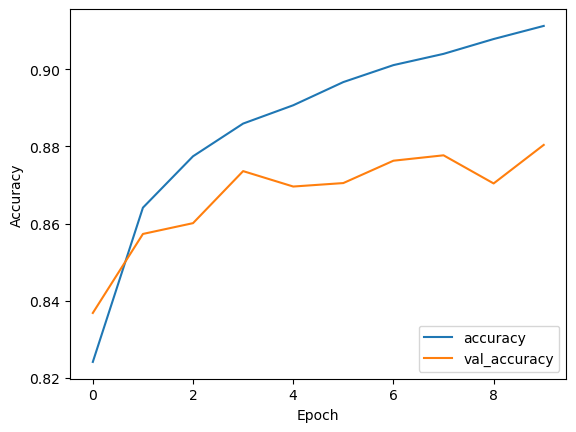

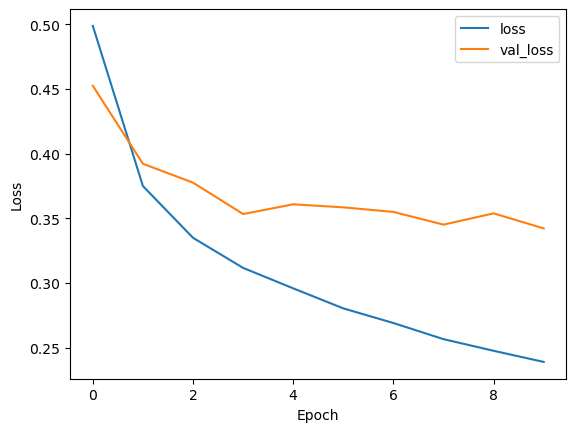

In [7]:
# Графики точности и потерь
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [10]:
# Отобразим сводку модели
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Визуализируем архитектуру модели
keras.utils.plot_model(model, show_shapes=True)